Data Visualization and Exploration
CPSC 5530
CRN 21428
Hunter Harris: zgt795
Assignment 4: Network & Tree Visualization 2

Import Libraries

In [60]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

Read Data

-----DataFrame for Creating the Network Visualization
          Target       Source   Edge Type  Weight
0          PADME        R2-D2  undirected      11
1        QUI-GON        R2-D2  undirected      14
2         ANAKIN        R2-D2  undirected      16
3          R2-D2        WATTO  undirected       3
4          C-3PO        R2-D2  undirected       2
..           ...          ...         ...     ...
130       DOFINE      TEY HOW  undirected       1
131  BRAVO THREE    BRAVO TWO  undirected       2
132  BRAVO THREE     RIC OLIE  undirected       2
133       ANAKIN  BRAVO THREE  undirected       1
134      EMPEROR        PADME  undirected       1

[135 rows x 4 columns]


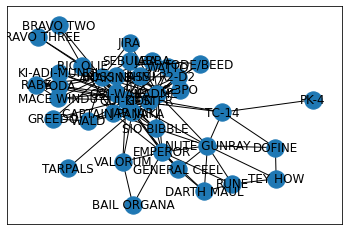

In [61]:
import json
#https://www.kaggle.com/datasets/ruchi798/star-wars
#https://networkx.org/
#https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
# Open JSON file
f = open('starwars-episode-1-interactions-allCharacters.json',)

# store json data
data = json.load(f)

source = []
target = []
weight = []

# Extract values from json format and store in lists
for i in data['links']:
    source.append(data['nodes'][i['source']]['name'])
    target.append(data['nodes'][i['target']]['name'])
    weight.append(i['value'])
edge_type = ['undirected']*len(source)

# Create DataFrame from the lists created above
sw_df = pd.DataFrame(list(zip(source,target,edge_type,weight)), columns=['Target', 'Source', 'Edge Type', 'Weight'])
print("-----DataFrame for Creating the Network Visualization")
print(sw_df)

# Closing the json file
f.close()

# Visualize the data as a network
network = nx.from_pandas_edgelist(sw_df, source='Source', target='Target', edge_attr='Weight')
nx.draw_networkx(network)
net = Network()

# Set Visualization Options
net.set_options("""
var options = {
  "nodes": {
    "borderWidthSelected": 3,
    "color": {
      "border": "rgba(43,124,233,1)",
      "highlight": {
        "border": "rgba(233,28,13,1)",
        "background": "rgba(255,207,47,1)"
      }
    },
    "font": {
      "strokeWidth": 4
    },
    "scaling": {
      "min": 12
    },
    "shadow": {
      "enabled": true
    }
  },
  "physics": {
    "barnesHut": {
      "springLength": 150,
      "avoidOverlap": 0.16
    },
    "minVelocity": 0.75
  }
}
""")
net.from_nx(network)

# Create html to easily view network visualization
net.show("star_wars.html")